In [43]:
%pylab inline
from soda.profiles import *
from astropy import units as u
from astropy import constants

Populating the interactive namespace from numpy and matplotlib


In [7]:
font = {'size':18, 'family':'serif'}
plt.matplotlib.rc('font', **font)

## Potential: 

\begin{equation}
\Phi (\tilde{r}) = v_{halo}^2  Ln(\tilde{r}^2 + d^2)
\end{equation}

Where $\tilde{r}$ is defined as:

\begin{equation}
\tilde{r} = r_A \dfrac{r_a + r_T}{r_a + r_A}
\end{equation}

\begin{equation}
r_A^2 = x^2 + y^2 + \dfrac{z^2}{q_z^2}
\end{equation}

\begin{equation}
r_T^2 = C_1 x^2 + C_2 y^2 + C_3 xy + \dfrac{z^2}{q_3^2}
\end{equation}

---------------------------------------------------------------

## Acceleration:

\begin{equation}
a_i = - \dfrac{\partial \Phi}{\partial x} \hat{i} = -2 \tilde{r} \dfrac{v_{halo}^2}{(\tilde{r}^2 + d^2)} \dfrac{\partial \tilde{r}}{\partial i} \hat{i}
\end{equation}

Where the index $i$ stands for $x, y, z$ and the partial derivative $\dfrac{\partial \tilde{r}}{\partial i}$ is:

\begin{equation}
\dfrac{d \tilde{r}}{di} = \left[ \left( r_a \dfrac{\partial r_A}{ \partial i} + \dfrac{\partial}{\partial i}(r_T r_A) \right) (r_a + r_A) - \dfrac{\partial r_A}{\partial i} (r_a + r_T)r_A \right] / (r_a + r_A)^2
\end{equation}

And the quantities $\dfrac{\partial r_A}{ \partial i}$ are:

\begin{equation}
\begin{split}
\dfrac{\partial r_A}{ \partial x} = \dfrac{x}{r_A} \\
\dfrac{\partial r_A}{ \partial y} = \dfrac{y}{r_A} \\
\dfrac{\partial r_A}{ \partial z} = \dfrac{z}{q_z^2r_A}
\end{split}
\end{equation}

Similarly the quanticies $ \dfrac{\partial}{\partial i}(r_T r_A)$ are:

\begin{equation}
\dfrac{\partial (r_T r_A)}{ \partial i} = r_A \dfrac{\partial r_T}{\partial i} + r_T \dfrac{\partial r_A}{\partial i}
\end{equation}

Where $\dfrac{\partial r_T}{\partial i}$ is:

\begin{equation}
\begin{split}
\dfrac{\partial r_T}{ \partial x} = \dfrac{2C_1 x + C_3 y}{2 r_T} \\
\dfrac{\partial r_T}{ \partial y} = \dfrac{2 C_2 y + C_3 x}{2 r_T} \\
\dfrac{\partial r_T}{ \partial z} = \dfrac{z}{q_3^2r_T}
\end{split}
\end{equation}


\begin{equation}
\begin{split}
\dfrac{\partial (r_T r_A)}{\partial x} = r_A \dfrac{2C_1 x + C_3 y}{2 r_T} + r_T \dfrac{x}{r_A} \\
\dfrac{\partial (r_T r_A)}{\partial y} = r_A \dfrac{2 C_2 y + C_3 x}{2 r_T} + r_T \dfrac{y}{r_A} \\
\dfrac{\partial (r_T r_A)}{\partial z} = r_A \dfrac{z}{q_3^2r_T} + r_T \dfrac{z}{q_z^2r_A}
\end{split}
\end{equation}



Therefore $\dfrac{d \tilde{r}}{di}$ is: 

\begin{equation}
\begin{split}
a_x =  -2 \tilde{r} \dfrac{v_{halo}^2}{(\tilde{r}^2 + d^2)  (r_a + r_A)^2}  \left[ \left( r_a \dfrac{x}{r_A} + r_A \dfrac{2C_1 x + C_3 y}{2 r_T} + r_T \dfrac{x}{r_A} \right) (r_a + r_A) - \dfrac{x}{r_A} (r_a + r_T)r_A \right] \hat{x}\\
a_y =  -2  \tilde{r} \dfrac{v_{halo}^2}{(\tilde{r}^2 + d^2) (r_a + r_A)^2}  \left[ \left( r_a \dfrac{y}{r_A} + r_A \dfrac{2 C_2 y + C_3 x}{2 r_T} + r_T \dfrac{y}{r_A} \right) (r_a + r_A) - \dfrac{y}{r_A} (r_a + r_T)r_A \right] \hat{y} \\
a_z =  -2  \tilde{r} \dfrac{v_{halo}^2}{(\tilde{r}^2 + d^2) (r_a + r_A)^2}  \left[ \left( r_a \dfrac{z}{q_z^2r_A} + r_A \dfrac{z}{q_3^2r_T} + r_T \dfrac{z}{q_z^2r_A} \right) (r_a + r_A) - \dfrac{z}{q_z^2r_A} (r_a + r_T)r_A \right] \hat{z}
\end{split}
\end{equation}

-------------------------------------------------------------------------------------

## Circular velocity:

\begin{equation}
v_c^2 = \tilde{r} \dfrac{\partial \Phi}{\partial \tilde{r}} = 2 \tilde{r}^2 \dfrac{v_{halo}^2}{(\tilde{r}^2 + d^2)} 
\end{equation}

In [8]:
def constants(x, y, z, phi, q1, q2):
    a1 = np.cos(phi)
    a2 = np.sin(phi)
    C1 = a1**2/q1**2 + a2**2/q2**2
    C2 = a1**2/q2**2 + a2**2/q1**2
    C3 = 2*a1*a2*(1/q1**2 - 1/q2**2)
    return C1, C2, C3

def VeraCiro13_pot(x, y, z, v_halo, phi, q1, q2, q3, qz, d, r_a):
    """
    VeraCiro potential: see \S2.1 of 
    http://adsabs.harvard.edu/abs/2013ApJ...773L...4V
    """
    phi = phi * np.pi/180.
    C1, C2, C3 = constants(x, y, z, phi, q1, q2)
    r_A = (x**2 + y**2 +z**2/qz**2)**0.5
    r_T = (C1*x**2 + C2*y**2 + C3*x*y + z**2/q3**2)**0.5
    r_til = r_A*(r_a + r_T)/(r_a + r_A)
    pot = (v_halo*u.km/u.s)**2 * np.log(r_til**2 + d**2)
    return pot.value


def VeraCiro13_acc(x, y, z, v_halo, phi, q1, q2, q3, qz, d, r_a):
    """
    Cartessian acceleration of the VeraCiro13 potential.
    """
    C1, C2, C3 = constants(x, y, z, phi, q1, q2)
    r_A = (x**2 + y**2 +z**2/qz**2)**0.5
    r_T = (C1*x**2 + C2*y**2 + C3*x*y + z**2/q3**2)**0.5
    r_til = r_A*(r_a + r_T)/(r_a + r_A)
    
    dr_dx = (((r_a*x/r_A + r_A*(2*C1*x + C3*y)/(2*r_T)) + r_T*x/r_A)*(r_a + r_A)
             - x*(r_a+r_T)/r_A)/ (r_a + r_A)**2.0
    
    dr_dy = (((r_a*y/r_A + r_A*(2*C2*y + C3*x)/(2*r_T)) + r_T*y/r_A)*(r_a + r_A)
             - y*(r_a+r_T)/r_A) / (r_a + r_A)**2.0
    
    dr_dz = (((r_a*z/(q_z**2*r_A) + r_A*z/(r_T*q_3**2)) + r_T*z/(r_A*q_z**2))*(r_a + r_A)
             - z*(r_a+r_T)/(r_A*q_z**2)) / (r_a + r_A)**2.0
        
    ax = -2*v_halo**2 * r_til / (r_til**2 + d**2)  * dr_dx
    ay = -2*v_halo**2 * r_til / (r_til**2 + d**2)  * dr_dy
    az = -2*v_halo**2 * r_til / (r_til**2 + d**2)  * dr_dz
    
    return ax, ay, az


def VeraCiro13_vc(x, y, z, v_halo, phi, q1, q2, q3, qz, d, r_a):
    C1, C2, C3 = constants(x, y, z, phi, q1, q2)
    r_A = (x**2 + y**2 +z**2/qz**2)**0.5
    r_T = (C1*x**2 + C2*y**2 + C3*x*y + z**2/q3**2)**0.5
    r_til = r_A*(r_a + r_T)/(r_a + r_A)
    vc = v_halo * r_til * (2 / (r_til**2 + d**2))**0.5
    return vc

In [5]:
n_points = 100
pot_grid = np.zeros([n_points, n_points, n_points])

x = np.linspace(-40, 40, n_points)
y = np.linspace(-40, 40, n_points)
z = np.linspace(-40, 40, n_points)

for i in range(len(x)):
    for j in range(len(y)):
        for k in range(len(z)):
            pot_grid[i][j][k] = VeraCiro13_pot(x[i], y[j], z[k], 200, 97, 1.38, 1, 1.36, 0.9, 12, 30 )

In [24]:
## computing the circular velocity
r = linspace(0, 80)
vc_x = VeraCiro13_vc(r, 0, 0, 135, 97, 1.38, 1, 1.36, 0.9, 12, 30 )
vc_y = VeraCiro13_vc(0, r, 0, 135, 97, 1.38, 1, 1.36, 0.9, 12, 30 )
vc_z = VeraCiro13_vc(0, 0, r, 135, 97, 1.38, 1, 1.36, 0.9, 12, 30 )

(0, 260)

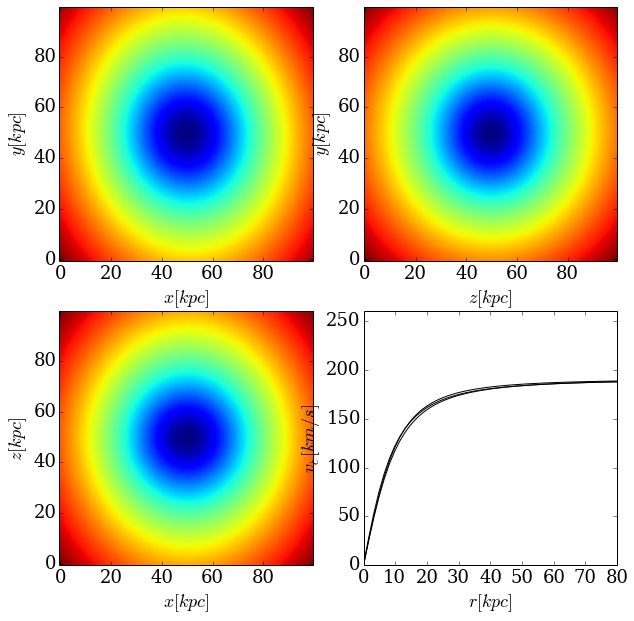

In [42]:
# reproducing fig 1. of VeraCrio13 et al. paper.

figure(figsize=(10, 10))
subplot(2, 2, 1)
imshow(pot_grid[:,:,39].T, origin='lower')
xlabel('$x[kpc]$')
ylabel('$y[kpc]$')

subplot(2, 2, 2)
imshow(pot_grid[39,:,:], origin='lower')
xlabel('$z[kpc]$')
ylabel('$y[kpc]$')

subplot(2, 2, 3)
imshow(pot_grid[:,39,:].T, origin='lower')
xlabel('$x[kpc]$')
ylabel('$z[kpc]$')



subplot(2, 2, 4)
plot(r, vc_x, c='k')
plot(r, vc_y, c='k')
plot(r, vc_z, c='k')
xlabel('$r[kpc]$')
ylabel('$v_c[km/s]$')
ylim(0, 260)